# Home is Where the Heart is: Determining Amazon's Furniture Line Customer Segments through Clustered Reviews

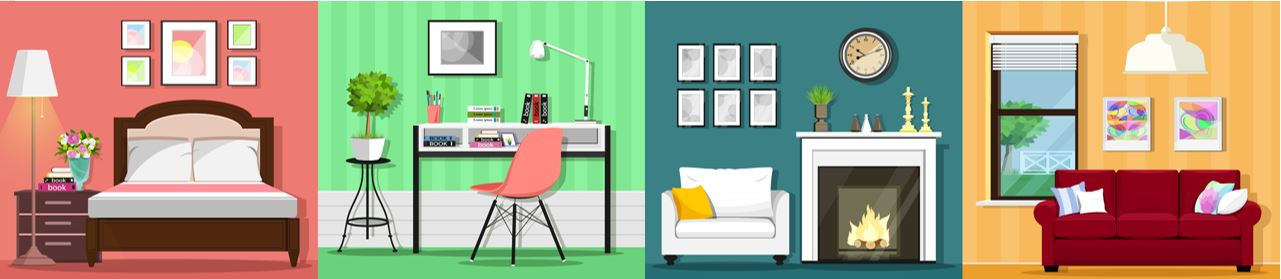

In [5]:
display(Image('outputs/banner.png'))

## Executive Summary

<p style="text-align:justify">Home is where the heart is. People do not normally pick the furniture they put in their homes at random. They look for pieces that reflect who they are and how they live. Hence, every customer has a unique set of preferences and needs that sellers of furniture need to understand in order to get them into their customer base. They cannot tailor the furniture items they sell to every single customer. They can, however, cluster similar customers together to identify specific segments that can guide them in creating targeted marketing strategies. The objective of this study is to then identify the different customer segments per category in Amazon’s furniture line to understand what customers in each segment look for when buying furniture for their homes. 
<br><br>Using the Amazon Customer Reviews Dataset for Furniture from 2002 to 2015 and limiting the scope of the study to the furniture item categories: desk, mattress, sofa, and drawer, we first analyzed the volume of the review section through the years, its general composition in terms of the furniture item categories, the general distribution of customer ratings for all categories in scope, and trends in the ratings over time. After which, we focused on the contents of the review section in determining the different customer segments by performing K-means clustering, internal validation, word frequency analysis, and Latent Semantic analysis.
<br><br>We have concluded from the study that across all categories, common segments were 1) customers who make sure that the quality of the furniture they bought equates to or even exceeds the price they paid for it and 2) customers who are price-conscious - often engaging in comparison shopping and always on the lookout for discounts. We also discovered three customer segments common among the desk, drawer, and sofa categories – items of which require assembly. The customer segments in the mattress category also valued quality of the items, but they differed from the other categories in the sense that customers also factored in who they were buying the item for and whether they bought the set version which included the bed frame, a complementary product of the mattress.
<br><br>Future studies may focus more on improving this study by filtering out words which can be considered noise in clustering the data or expanding the dataset to include either more recent reviews or reviews from customers outside the US market.</p>

## I. Introduction

<p style="text-align:justify">According to United States-based Consumer News and Business Channel (CNBC), Amazon remains to be the undisputed leader in the field of online retailing. The COVID-19 pandemic continues to drive consumers to do most if not yet their entire shopping online hence, e-commerce sales are increasing rapidly and Amazon’s share in these is projected increase substantially as well.$^1$ With Amazon’s increased dominance in online retailing, they are gaining more power to heavily influence negotiations with suppliers to their favor.
<br><br>Several companies rely heavily on Amazon thus, even with the increased demands, they try to play by the giant retailer’s rules just to keep their brand in the platform. However, some large companies who are more self-sustainable are starting to consider exiting Amazon and creating an online sales platform in their own websites to gain back control over their product pricing and interaction with consumers among many other. Since Amazon is the one directly selling to customers, they get to acquire valuable customer data which allows them to gain important insights on top-selling items. They then leverage on this by creating their own in-house brands to produce the items in a cost-efficient manner that will allow them to sell it for prices much lower than the original brands. This move by Amazon is obviously hurting the sales of brands selling on their platform. An example of which is Duracell’s previously top-selling batteries which have been overtaken by Amazon’s in-house batteries.$^2$
<br><br>Amazon may be winning the game right now, but the impending exit of its top brands can possibly take a turn for the worse. Hence, they need to make sure that consumers will continue to patronize their online sales platform by understanding what different customers look for when buying furniture for their homes. </p>


<b>Problem Statement</b>

What are the different customer segments per category in Amazon’s furniture line based on the customer feedback?

<b>Motivation</b>

<p style="text-align:justify">In this paper, we focus on the furniture section of Amazon. Furniture is one of the more expensive item categories consumers shop for. With the ongoing pandemic, consumers have gone online to purchase these despite the uncertainty brought about by not being able to see the items personally. Online sales for furniture items have been seen to increase recently and are expected to continue so with the prevailing work-from-home/ study-from-home setup these days. With consumers spending more time at home, we look into four categories of furniture which we believe are gaining wide increases in demand – <code>desk</code>, <code>mattress</code>, <code>sofa</code>, and <code>drawer</code>. We then aim to determine the different customer segments of Amazon's furniture line to understand what customers in each segment look for when buying furniture for their homes. By understanding what the different customer segments value in buying furniture, we get a glimpse of their respective lifestyles. This can then help Amazon implement more targeted marketing campaigns for their in-house brands to retain and hopefully, grow their existing customer base for furniture. This can also help them create items best suited for each segment.</p>

## II. Methodology

<p style="text-align:justify">The methodology used in the study are outlined below:</p>

<b>1. Data Processing</b>
<p style="text-align:justify">Extract dataset, store it in a pandas.DataFrame object, and clean the data by transforming into lower case, removing stop words, lemmatizing, etc. using nltk and pandas library</p>

<b>2. Perform Exploratory Data Analysis to explore reviews in the furniture category</b>
<p style="text-align:justify">In performing exploratory data analysis, modules including pandas, matplotlib, and wordcloud were used to manipulate data and generate visualizations. This step aims to glean insights on four primary aspects:</p>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. <i>Number of Reviews over the years</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By using line plot we can compare the number of reviews per year and the total number of votes.<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. <i>Distribution of the number of category sold overall</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By using bar plots we can explore the distribution of the number of samples that we got that belongs to the chosen category.<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. <i>Distribution of the overall review rating that Amazon received</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By using bar plots we can explore the overall distribution of the review ratings and create an overall insights of their performance<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. <i>Trends of the overall rating that the Amazon received throughout the years</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By using line plots we can explore the trend of the ratings and see if the review rating is improving over the years.<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;v. <i>Explore on the common words that appear in a category</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By using word cloud and bar plots we can visualize the most common words that appear in a category.<br>

<b>3. Unsupervised Machine Learning</b>
<p style="text-align:justify">We then perform clustering and latent semantic analysis to identify the different customer segments that the Amazon Furniture have:</p>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. <i>Clustering</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This is done by using K-means clustering using euclidean distance and by choosing the number of clusters using internal validation criteria such as: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>Sum of squares distances to centroids</code>, <code>Calinski-Harabasz score</code>, <code>Silhouette score</code>, and <code>Gap Statistics.</code> The group was able &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; to test on both K-means and K-medians but found that the best distribution of clusters and similarity measures are found using K-means<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. <i>Latent Semantic Analysis</i></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By performing LSA on our data, we could determine the components that make up the clusters per category while mitigating synonymy.<br>

<p>Each steps outlined are going to be discussed in detail on the succeeding sections.</p>

## III. Data Processing

In [2]:
# import libraries
import pandas as pd
import re
import numpy as np
import os
import pickle
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Download nltk requirements
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.base import clone
from sklearn.decomposition import TruncatedSVD

from IPython.display import HTML, Image

from tqdm import tqdm
tqdm.pandas()

# define constants
AMAZON_COLORS = ['#000000', '#FF9900', '#146EB4', 
                 '#FFFFFF', '#232F3E', '#EDEDED',
                 '#F0A758', '#1C1919']

# Toggle codes and center figures
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<style>
.output_png {
    display: table-cell;
    text-align: center;
    horizontal-align: middle;
    vertical-align: middle;
    margin:auto;
}
</style>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

### A. Extract Dataset

<p style="text-align:justify">This study uses data that was extracted from Amazon datasets that can be found on this <a href="https://registry.opendata.aws/amazon-reviews/">link</a>. Amazon provides open source datasets regarding any topics such as space, health, and many more. In this study, we used Amazon Customer Reviews Dataset, in particular, in the category of furnitures between 2000 to 2015 and loaded it to DataFrame.

In [4]:
pth = '/mnt/data/public/amazon-reviews/'
fname = 'amazon_reviews_us_Furniture_v1_00.tsv.gz'
df = pd.read_csv(os.path.join(pth, fname), 
                 delimiter='\t', compression='gzip', error_bad_lines=False,
                 warn_bad_lines=False)

display(HTML('''<center style="font-size:12px;font-style:default;">
<b>Table 1. Data Description of raw data 
from Amazon dataset.</b></center>'''))

| Column | Data type | Description | 
| :---- | :---------: | :----- |
| `marketplace` | string | Country of origin (All US)|
| `customer_id	` | int | Customer id of the reviewer |
| `review_id	` | int | Unique review_id id |
| `product_id	` | int | product id of being reviewed|
| `product_title` | string | The product that is being reviewed |
| `product_category` | string | The category of product that is being reviewed (All furnitures)|
| `star_rating` | integer | Rating of the review that ranges from one to five with five being most satisfied |
| `helpful_votes` | integer | customer votes found by customers to be helpful |
| `total_votes` | integer | total customer votes|
| `vine` | character | is vine reviewer (Y/N)|
| `verified_purchase` | character | is verified purchase (Y/N)|
| `review_headline` | string |headline of the review|
| `review_body	` | string | Review of the product |
| `review_date	` | date | Date of the review formatted as (YYYY-MM-DD) |


### B. Preprocess Dataset

#### i. Cleaning of dataset

1. We chose on the variables of interest namely `product_title`, `star_rating`, `review_body`, `review_date`, and `total_votes` that we used for the analysis of this study;
2. We then got the common pieces of furniture that Amazon offers such as *Desk*, *Sofa*, *Mattress*, and *Drawer*.

In [3]:
# retain only relevant columns for analysis
df_review = df.loc[:, ['product_title', 
                       'star_rating', 'review_body',
                       'review_date', 'total_votes']]

# get category bed, sofa, desk, pillow, drawer
search_string = '(desk|sofa|mattress|drawer)'
df_review['subcat'] = (df_review.product_title.str.casefold()
                                 .str.extract(fr'{search_string}'))

df_review_top = df_review.dropna().copy()

display(HTML('''<center style="font-size:12px;font-style:default;">
<b>Table 2. Raw data from Amazon dataset.</b></center>'''))
display(df_review_top.head())

product_title  star_rating  \
0                           Shoal Creek Computer Desk            4   
2   Bathroom Vanity Table Jewelry Makeup Desk Benc...            5   
3   Sleep Master Ultima Comfort Memory Foam 6 Inch...            3   
22                       Etna Sofa Side Table (Black)            3   
24  Signature Sleep Contour 8 Inch Independently E...            5   

                                          review_body review_date  \
0   This desk is very study and it i has  a beauti...  2015-08-31   
2   Perfect fit for my bedroom, been wanting one s...  2015-08-31   
3   We use this on a trundle bed.  So, it does not...  2015-08-31   
22  Functional but too lightweight - I ordered 2 a...  2015-08-31   
24                                    so comfortable!  2015-08-31   

    total_votes    subcat  
0             0      desk  
2             1      desk  
3             0  mattress  
22            0      sofa  
24            0  mattress

<p style="text-align:justify">We performed the following <b>preprocessing techniques</b> for the reviews text listed below:
<ol>
    <li> We used <code>nltk punkt</code> to properly tokenize the words in English that are going to be useful in the succeeding preprocessing of reviews.
    <li> We then performed casefolding to enable case-insensitive reviews such that we want <code>GOOD</code> and <code>good</code> to be counted as single word. 
    <li> We also decided to perform lemmatization from <code>nltk WordNetLemmatizer</code> to the tokens such that we want <code>bed</code> and <code>beds</code> to be counted as single word. Treating the root words separately would not accurately capture the importance of the word in our analysis.
    <li> We removed english stopwords from <code>nltk stopwords</code> to prevent low-level information such as <code>about</code>, <code>without</code>, etc from our reviews in order to give more importance to the relevant information
<li> We filtered words with less than 3 character length prevent words like <code>the</code>, <code>be</code> that wouldn't have importance for our analysis 
    <li> Lastly, we filtered common furniture words such as <code>desk</code>, <code>sofa</code>, etc. because if they are reviewing that product we expect to see these words frequently which is not very informative and dilutes the importance of other describing words such as <code>soft</code>, <code>comfortable</code>.
</ol></p>

In [49]:
# tokenize
tokenize = df_review_top.review_body.progress_apply(nltk.word_tokenize)

# casefold
lower_case = tokenize.progress_apply(lambda x:
                                     list(map(lambda y: y.casefold(), x)))


# lemmatize
lemmatizer = WordNetLemmatizer()
lemmatize = lower_case.progress_apply(lambda x: list(map(lemmatizer.lemmatize,
                                                         x)))

# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_stopwords = lemmatize.progress_apply(lambda x:
                                              list(filter(lambda y: y
                                                          not in stop_words,
                                                          x)))

# filter words with less than 3 character length
filtered_words = filtered_stopwords.progress_apply(lambda x:
                                                   list(filter(lambda y:
                                                               len(y) > 3,
                                                               x)))


# filter common furniture words
furn_words = ['sofa', 'desk', 'chair', 'mattress', 'couch',
              'dresser', 'table', 'furniture']
# common_words = r'(love|great|good|perfect|nice|drawer)'
filtered_words = filtered_words.progress_apply(lambda x:
                                               list(filter(lambda y: y
                                                           not in
                                                           furn_words,
                                                           x)))

In [5]:
df_review_top['review_clean_tokenize'] = filtered_words

We transformed tokenized words to review string

In [6]:
df_review_top['review_clean'] = (df_review_top.review_clean_tokenize
                                 .apply(' '.join))

display(HTML('''<center style="font-size:12px;font-style:default;">
<b>Table 3. Clean dataset after performing preprocessing techniques.
</b></center>'''))
display(df_review_top.head())

product_title  star_rating  \
0                           Shoal Creek Computer Desk            4   
2   Bathroom Vanity Table Jewelry Makeup Desk Benc...            5   
3   Sleep Master Ultima Comfort Memory Foam 6 Inch...            3   
22                       Etna Sofa Side Table (Black)            3   
24  Signature Sleep Contour 8 Inch Independently E...            5   

                                          review_body review_date  \
0   This desk is very study and it i has  a beauti...  2015-08-31   
2   Perfect fit for my bedroom, been wanting one s...  2015-08-31   
3   We use this on a trundle bed.  So, it does not...  2015-08-31   
22  Functional but too lightweight - I ordered 2 a...  2015-08-31   
24                                    so comfortable!  2015-08-31   

    total_votes    subcat                              review_clean_tokenize  \
0             0      desk  [study, beautiful, finish, think, little, pric...   
2             1      desk   [perfect, bedroom, wanting, since, little, girl]   
3             0  mattress  [trundle, much, much, better, choice, getting,...   
22            0      sofa  [functional, lightweight, ordered, attached, t...   
24            0  mattress                                      [comfortable]   

                                         review_clean  
0     study beautiful finish think little pricey size  
2           perfect bedroom wanting since little girl  
3   trundle much much better choice getting spring...  
22   functional lightweight ordered attached together  
24                                        comfortable

We saved the clean dataset to a pickle file so that a user will not have to run all the commands above all the time.

In [7]:
df_review_top.to_pickle('clean_amazon_dataset.pkl')

#### iii. Transform review text into its vector representation

<p style="text-align:justify">Fit and transform to Tf-idf vector using <code>sklearn.feature_extraction.text.TfidfVectorizer</code>. We have used the following parameters for the <code>TfidfVectorizer</code>:
<ul>
    <li>token_pattern : <code>r'\b[a-z]+\b'</code> - We have defined words as strictly composed of letters in the alphabet prefixed and suffixed by a word boundary</li>
    <li>ngram_range : <code>(1, 2)</code> - We used 1 to 2 ngrams to capture single and compound words such as <i>computer desk</i>, and <i>desk</i></li>
    <li>max_df : <code>0.8</code> - We set the limit of the maximum document frequency to be 80% to remove words that appear too frequently</li>
    <li>min_df : <code>0.01</code> - We set the limit of the minimum document frequency to be 1% to ignore the words that appear too infrequently to our data that would improve also the performance of our model.</li></p>

In [50]:
# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b[a-z]+\b', 
                                   ngram_range=(1, 2),
                                   max_df=0.8,
                                   min_df=0.01)

# get bag of words representation
bow_ng_all = defaultdict(dict)
for cat in tqdm(df_review_top.subcat.unique()):
    prod = df_review_top[df_review_top.subcat==cat].copy()
    bow_ng = tfidf_vectorizer.fit_transform(prod['review_clean'])
    df_bow = pd.DataFrame.sparse.from_spmatrix(
                bow_ng, columns=tfidf_vectorizer.get_feature_names())

    bow_ng_all[cat] = df_bow

We saved the TfidfVector representation of our reviews in a pickle file to preserve the python object representation of our reviews since it is a dictionary.

In [10]:
# save as pickle file to preserve datatypes
with open('bow_ng.pkl', 'wb') as f:
    pickle.dump(bow_ng_all, f, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# read pickle file
with open('bow_ng.pkl', 'rb') as f:
    bow_ng_all = pickle.load(f)

display(HTML('''<center style="font-size:12px;font-style:default;">
<b>Table 4. TF-IDF vector representation of the reviews.
</b></center>'''))
display(bow_ng_all['desk'].head())

able  absolutely  actually  adjust  adjustable  almost  along   already  \
0   0.0         0.0       0.0     0.0         0.0     0.0    0.0  0.000000   
1   0.0         0.0       0.0     0.0         0.0     0.0    0.0  0.000000   
2   0.0         0.0       0.0     0.0         0.0     0.0    0.0  0.520703   
3   0.0         0.0       0.0     0.0         0.0     0.0    0.0  0.000000   
4   0.0         0.0       0.0     0.0         0.0     0.0    0.0  0.000000   

   also  although  ...  work well  worked  working  worth  would  \
0   0.0       0.0  ...        0.0     0.0      0.0    0.0    0.0   
1   0.0       0.0  ...        0.0     0.0      0.0    0.0    0.0   
2   0.0       0.0  ...        0.0     0.0      0.0    0.0    0.0   
3   0.0       0.0  ...        0.0     0.0      0.0    0.0    0.0   
4   0.0       0.0  ...        0.0     0.0      0.0    0.0    0.0   

   would recommend  wrench  writing  wrong  year  
0              0.0     0.0      0.0    0.0   0.0  
1              0.0     0.0      0.0    0.0   0.0  
2              0.0     0.0      0.0    0.0   0.0  
3              0.0     0.0      0.0    0.0   0.0  
4              0.0     0.0      0.0    0.0   0.0  

[5 rows x 494 columns]

### C. Data Description

 We decided to limit our scope as well to the common furnitures that are being offered in Amazon such as <i>Desk</i>, <i>Sofa</i>, <i>Mattress</i>, and <i>Drawer</i>. The data includes features such as <code>product_title</code>, <code>star_rating</code>, <code>review_date</code>, <code>review_body</code>, and the <code>total_votes</code>. In addition, we have created a new feature such as <code>subcat</code>, and <code>review_clean_tokenize</code> that we will be using for our analysis.</p>

Our dataset contains 145,633 number of reviews with features indicated in Table 4.
<center style="font-size:12px;font-style:default;"><b>Table 5. Descriptions of the features used after preprocessing.</b></center>

| Column | Data type | Description | 
| :---- | :---------: | :----- |
| `product_title` | string | The product that is being reviewed |
| `star_rating` | integer | Rating of the review that ranges from one to five with five being most satisfied |
| `review_body	` | string | Review of the product |
| `review_date	` | date | Date of the review formatted as (YYYY-MM-DD) |
| `total_votes` | integer | Total number of votes per review |
| `subcat` | string | Category of the furnitures (desk, sofa, mattress, drawer) |
| `review_clean_tokenize` | list | Tokenized and preprocessed representation of the reviews |


## IV. Exploratory Data Analysis

### A. Reviews through the Years

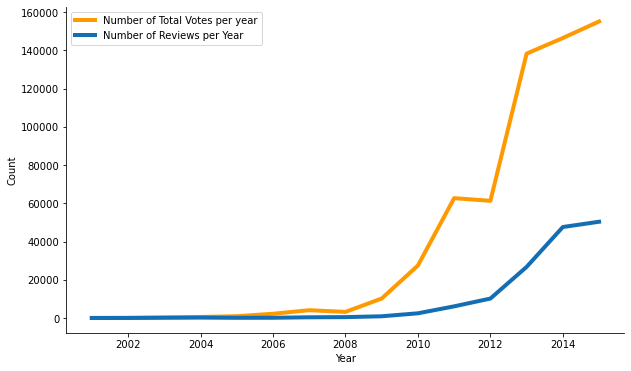

In [12]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 1. Number of reviews and votes per year.</b></center>'''))

date = pd.to_datetime(df_review_top.review_date)
df_review_top.groupby(date.dt.year)['total_votes'].sum()

display(HTML(f'''<h3 style="text-align:center">
                More customers
                are being <b style="color:{AMAZON_COLORS[1]}">
                active</b> in the review section of their platform 
                per year
                </h3>'''))
plt.figure(figsize=(10, 6))
plt.plot(df_review_top.groupby(date.dt.year)['total_votes'].sum(), 
        label='Number of Total Votes per year', lw=4.0, 
        color=AMAZON_COLORS[1])
plt.plot(df_review_top.groupby(date.dt.year).size(), 
         label='Number of Reviews per Year', lw=4.0,
         color=AMAZON_COLORS[2])
spines = ['right', 'top']
ax = plt.gca()
[ax.spines[spine].set_visible(False) for spine in spines]
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count');

We can see in figure 1 the trend of the number of reviews and votes per year. We notice that it is steadily growing exponentially. This is expected as we move to the digital era as customers are looking for physical evidence on a specific product before buying it.

### B. Furniture Line Proportion of Categories

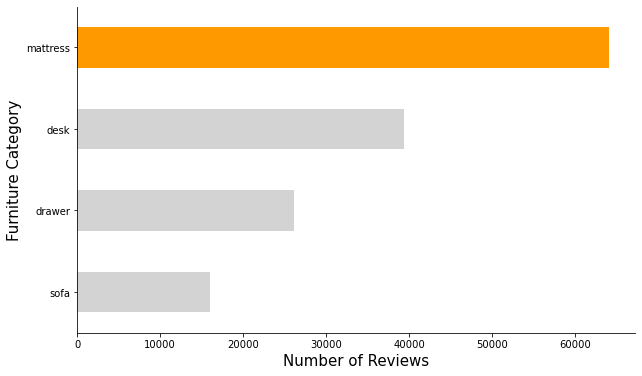

In [13]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 2. Number of reviews per category.</b></center>'''))

display(HTML(f'''<h3 style="text-align:center">
                The <b style="color:{AMAZON_COLORS[1]}">
                mattress</b> category dominates the
                customer review section
                </h3>'''))

fture_df = pd.read_pickle('clean_amazon_dataset.pkl')
cat_mix = fture_df['subcat'].value_counts(ascending=True)
plt.figure(figsize=(10, 6))
cat_mix.plot.barh(color=['lightgray'] * 3 + [AMAZON_COLORS[1]])
plt.xlabel("Number of Reviews", fontsize=15)
plt.ylabel("Furniture Category", fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

<p style="text-align:justify">Figure 2 shows the proportion of the total number of reviews attributable to each furniture category included in this study. We can see that the mattress category tops in percentage which implies that it is among Amazon's top selling items in the furniture line. This insight is hardly surprising given that people in general spend more time on their bed compared to any other furniture.
<br><br>Coming in second is the desk category. Even before the COVID-19 pandemic, desks have already been a staple in households for working, studying, writing, etc.</p>

### C. Overall Average Customer Ratings for the Furniture Line

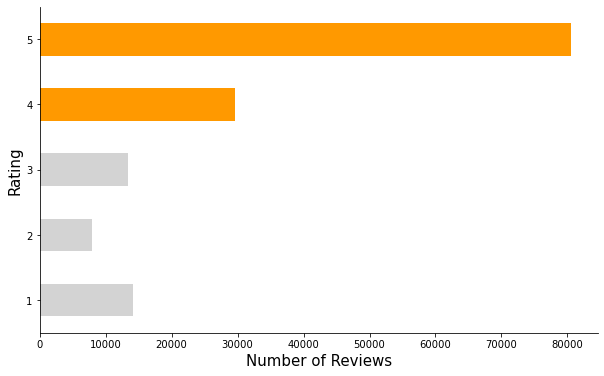

In [14]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 3. Number of reviews per rating.</b></center>'''))

display(HTML(f'''<h3 style="text-align:center">
                <b style="color:{AMAZON_COLORS[1]}">
                High ratings</b> dominate the customer review section
                </h3>'''))

cat_mix = fture_df['star_rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
cat_mix.plot.barh(color=['lightgray','lightgray', 'lightgray',
                         AMAZON_COLORS[1], AMAZON_COLORS[1]])
plt.xlabel("Number of Reviews", fontsize=15)
plt.ylabel("Rating", fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Figure 3 shows that majority of the average customer ratings for Amazon's furniture items from 2002 to 2015 are in the upper part of the spectrum. This is reflective of why Amazon was able to maintain a large customer base.

### D. Average Ratings of Furniture Line through Time

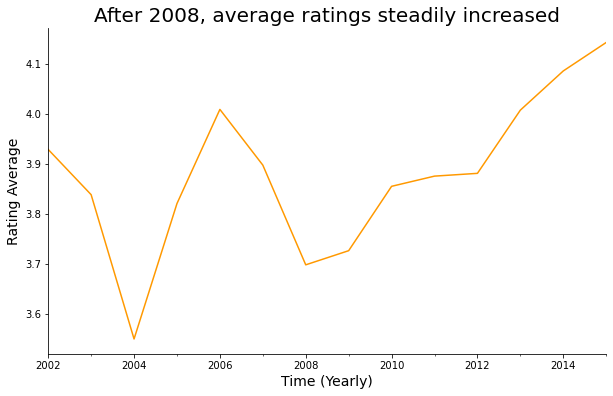

In [15]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 4. Average ratings of furniture sales per year.</b></center>'''))

fture_df_time = fture_df.copy()
fture_df_time['review_date'] = pd.to_datetime(fture_df_time['review_date'])
fture_df_time = fture_df_time.loc[fture_df_time.review_date.dt.year != 2001]
rate_time_year = (fture_df_time.groupby(pd.Grouper(key="review_date",
                                                   freq="Y"))['star_rating']
                  .mean())
plt.figure(figsize=(10, 6))
rate_time_year.plot.line(color=AMAZON_COLORS[1])
plt.xlabel("Time (Yearly)", fontsize=14)
plt.ylabel("Rating Average", fontsize=14)
plt.title("After 2008, average ratings steadily increased", fontsize=20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

<p style="text-align:justify">Looking at figure 4, we can see that the lowest dip occurred in 2004. After 2004, Amazon was able to raise the average ratings again until 2006 where a peak was reached before they went down again. A dip in the average ratings was experienced again in 2008, but after which, they increased steadily.
<br><br>For the 2008 dip, it can be surmised that due to the Financial Crisis then, consumers were driven to be more thrifty and rigid in their evaluation of the value for money of items bought.<br>The steady increase after 2008 may imply that Amazon was able to understand their consumers better and implement the changes needed every year to satisfy their needs and wants in terms of furniture items.</p>

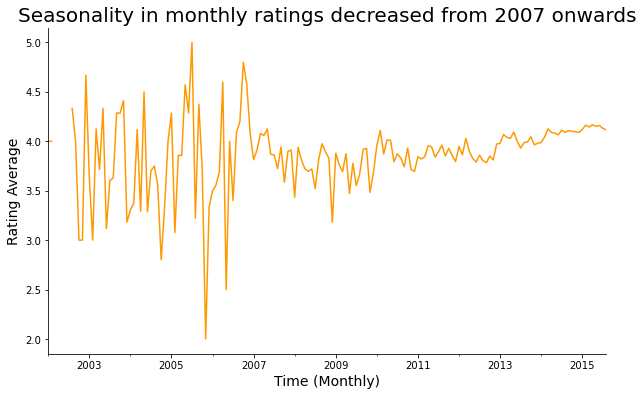

In [16]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 5. Average ratings of furniture sales per month.</b></center>'''))

rate_time_month = (fture_df_time.groupby(pd.Grouper(key="review_date",
                                                    freq="M"))['star_rating']
                   .mean())
plt.figure(figsize=(10, 6))
rate_time_month.plot.line(color=AMAZON_COLORS[1])
plt.xlabel("Time (Monthly)", fontsize=14)
plt.ylabel("Rating Average", fontsize=14)
plt.title("Seasonality in monthly ratings decreased from 2007 onwards", 
          fontsize=20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

<p style="text-align:justify">Zooming in on the average ratings over time graph by looking at the monthly perspective, we witness the presence of seasonality. Amazon had a fairly constant seasonality from 2002 until mid-2005 when the amplitude started to increase. The fluctuating volatility in the ratings continued until mid-2006. The average ratings became less and less volatile from 2007 onwards. Although seasonality was still present from 2014 to 2015, it is also notable that the average ratings seem to be steadily increasing at the time.
<br><br>Consistent with the yearly graph, we can see that in the latter years, Amazon seems to have been able to resolve the issues brought up in the low ratings. However, unlike the yearly graph where we saw the lowest dip in 2004, this monthly graph shows the lowest dip in the last leg of 2005.</p>

### E. Word Cloud for each Furniture Category

<p style="text-align:justify">Analysis of Amazon ratings in Figures 3-5 have led us to conclude that majority of the reviews belong to the positive side of the spectrum. This implies that customers of the furniture line are generally happy about their purchases from Amazon hence, the continuous growth in customer base. <br><br>The goal now is to go deeper by understanding the preferences and needs of different customers to provide Amazon with insights on how to retain and grow their existing customer base. We believe that this can be achieved by solely focusing on the contents of the review section. Hence, from this point onwards, ratings will not be part of further analysis.</p>

In [22]:
word_cloud = pd.read_pickle('clean_amazon_dataset.pkl')


def orange_color(word, **kwargs):
    """Create a palette for the word cloud to be generated"""
    np.random.seed(0)
    return np.random.choice(['darkorange', 'orange', 'bisque'])


def create_word_cloud(sub_cat, title_hori_position):
    """ Generate a wordcloud based on the category specified
    Parameters
    ----------
    sub_cat              :  string
                            furniture line category
    title_hori_position  :  float
                            x position to place the category name in the text
    """
    try:
        mask = np.array(Image.open(str(sub_cat)+".jpg"))
    except:
        mask = np.array(Image.open(str(sub_cat)+".png"))
    category = word_cloud[(word_cloud.subcat == sub_cat)]
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))


    word_cloud['review_clean'] = (word_cloud['review_clean_tokenize']
                                  .apply(' '.join))
    word_cloud_cat = word_cloud[word_cloud.subcat == sub_cat]
    text = ' '.join(word_cloud_cat['review_clean'].to_list())
    generated_wc = (WordCloud(mask=mask, background_color='white')
                    .generate(text))

    ax.imshow(generated_wc.recolor(color_func=orange_color),
                 interpolation="bilinear")
    ax.axis("off")
    plt.figtext(title_hori_position, 1, str(sub_cat).title(),
                fontsize='25', color=AMAZON_COLORS[4], ha='center',
                fontweight='bold')

    plt.show()

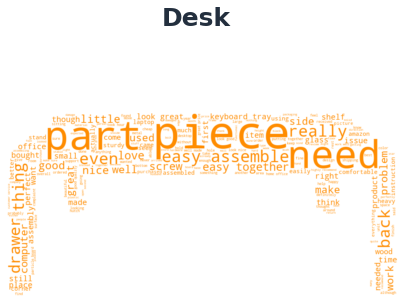

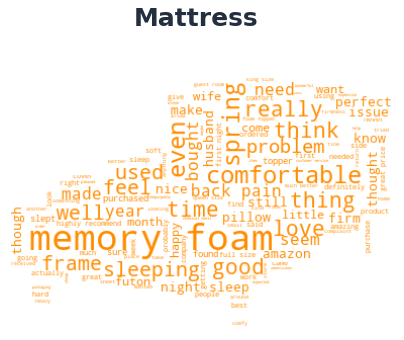

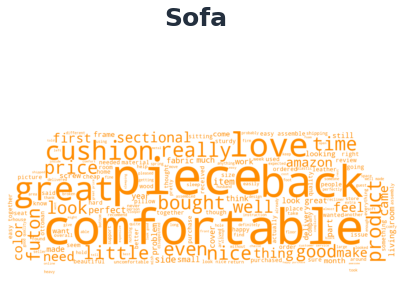

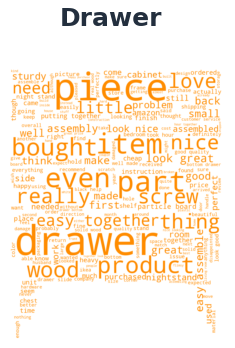

In [14]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 6. Ratings mix and word cloud per category.</b></center>'''))

create_word_cloud('desk', title_hori_position=0.5)
create_word_cloud('mattress', title_hori_position=0.5)
create_word_cloud('sofa', title_hori_position=0.5)
create_word_cloud('drawer', title_hori_position=0.5)

<p style="text-align:justify">We listed notable words or group of words identified from the word cloud for each category as follows:
<br>1. <code>desk</code> - easy assemble, screw, drawer, together, good, piece, need
<br>2. <code>mattress</code> - memory foam, frame, back pain, spring, comfortable, night, sleeping, time, problem, feel, love
<br>3. <code>sofa</code> - cushion, great, table, comfortable, nice, price, piece, time, good, back, love, feel, color
<br>4. <code>drawer</code> - easy assemble, wood, look nice, screw, great, love, sturdy, nice, together
<br><br>It seems that the common primary priorities for customers of Amazon's furniture line include ease of assembly, comfortability, and timeliness (of delivery). For <code>desks</code>, it seems that types that come with drawers are preferred. For <code>mattresses</code>, the customers value a good mix of memory foam quality and spring quality to get a good night's sleep. For <code>sofas</code>, concepts of cushion, price, and color are given importance. And finally, for <code>drawers</code>, sturdiness along with the quality and aesthetic of wood material used seem to be favored.</p>

## V. Results and Discussion

The flow of results and discussion for all of the categories will follow:
<ol>
    <li>Perform clustering using K-means - <code>K means</code> is a representative based clustering method that uses Euclidean distance as a distance metric. Since there are only few outliers on our data this is the best method to use as it is faster and provided a better result than that of K-median</li>
<li> Since we have no external labels, we have chosen internal validations that covers the separation between different clusters and the similarity within clusters:</li>
     <ul>
         <li><code>Sum of squares distances to centroids</code> - It computes for the distances of each point to its clusters meaning the smaller the value of it means data are closer to its centroid.</li>
         <li><code>Calinski-Harabasz score</code> -  it is the ratio of the between-clusters dispersion mean and the within-cluster dispersion. Higher value means the more defined each clusters are.</li>
         <li><code>Silhouette score</code> -  Also a measure of separation between clusters based on the shortest distance of other cluster and the average distance of its own cluster</li>
         <li><code>Gap Statistics</code> -  Compares the inertia to a null reference uniform distribution.</li>
     </ul>
<li> Check on the distribution of each of the clusters</li>
<li> Choose a number of clusters based on steps 1-3</li>
<li> Perform Analysis based on the chosen number of clusters</li>
    <ul>
        <li> Word frequency - what are the most common words used in each of the clusters</li>
        <li> Latent Semantic Analysis - what are the hidden features found on each of the clusters? What words correlates to each other </li>
    </ul>
        </ol>
          

In [7]:
# Utility Functions
def pooled_within_ssd(X, y, centroids, dist):
    """Compute pooled within-cluster sum of squares around the cluster mean
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Cluster centroids
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
        
    Returns
    -------
    float
        Pooled within-cluster sum of squares around the cluster mean
    """
    out = []
    for i in range(len(centroids)):
        out.append(sum(map(lambda x: 
                           dist(x, centroids[i])**2, X[y==i]))
                   /(2*len(X[y==i])))

    return sum(out)


In [8]:
def gap_statistic(X, y, centroids, dist, b, clusterer, random_state=None):
    """Compute the gap statistic
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Cluster centroids
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
    b : int
        Number of realizations for the reference distribution
    clusterer : KMeans
        Clusterer object that will be used for clustering the reference 
        realizations
    random_state : int, default=None
        Determines random number generation for realizations
        
    Returns
    -------
    gs : float
        Gap statistic
    gs_std : float
        Standard deviation of gap statistic
    """
    rng = np.random.default_rng(1337)
    Wk = pooled_within_ssd(X, y, centroids, dist)
    out = []
    for i in range(b):
        sim_x = rng.uniform(X.min(axis=0), X.max(axis=0), size=X.shape)

        sim_y = clusterer.fit_predict(sim_x)
        sim_centroids = clusterer.cluster_centers_

        Wk_sim = pooled_within_ssd(sim_x, sim_y, sim_centroids, dist)
        out.append(np.log(Wk_sim) - np.log(Wk))

    return np.mean(out), np.std(out)

In [9]:
def cluster_range(X, clusterer, k_start, k_stop):
    """ Cluster the input X and compute for its 
        internal and external validation
    
    Parameters
    ----------
    X         :    np.ndarray
                   data containing features and samples
    clusterer :    sklearn.cluster._kmeans.KMeans
                   Kmeans object
    k_start   :    int
                   start number of clusters
    k_stop    :    int 
                   end number of clusters
    
    Returns
    -------
    cluster_range  : dict
                     contains details on clusters formed, and 
                     internal and external validation
    """
    ys = []
    centers = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    for k in tqdm(range(k_start, k_stop+1)):
        clusterer_k = clone(clusterer)
        clusterer_k.set_params(n_clusters=k)
        y = clusterer_k.fit_predict(X)
        
        ys.append(y)
        centers.append(clusterer_k.cluster_centers_)
        inertias.append(clusterer_k.inertia_)
        
        chs.append(calinski_harabasz_score(X, y))
        
        scs.append(silhouette_score(X, y))
        
        gs = gap_statistic(X, y, clusterer_k.cluster_centers_, 
                                 euclidean, 5, 
                                 clone(clusterer).set_params(n_clusters=k), 
                                 random_state=1337)
        
        gss.append(gs[0])
        gssds.append(gs[1])
        
    res = {'ys' : ys, 
           'centers' : centers, 
           'inertias' : inertias, 
           'chs' : chs, 
           'scs' : scs, 
           'gss' : gss, 
           'gssds' : gssds}

    return res

In [10]:
def plot_validation(res_mean, k=6):
    n_clusters = len(res_mean['ys']) + 1
    fig, axes = plt.subplots(2, 2, figsize=(15, 7))
    axes = axes.flatten()
    axes[0].plot(range(2, n_clusters + 1), res_mean['inertias'], lw=4, 
                color=AMAZON_COLORS[1])
    axes[0].set_title('Sum of squares distances to centroids');
    axes[1].plot(range(2, n_clusters + 1), res_mean['chs'], lw=4, 
                color=AMAZON_COLORS[1])
    axes[1].set_title('Calinski-Harabasz Score');
    axes[2].plot(range(2, n_clusters + 1), res_mean['scs'], lw=4, 
                color=AMAZON_COLORS[1])
    axes[2].set_title('Silhouette Score');
    axes[3].plot(range(2, n_clusters + 1), res_mean['gss'], lw=4, 
                color=AMAZON_COLORS[1])
    axes[3].set_title('Gap Statistics');

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axvline(k, ls='--', color=AMAZON_COLORS[2], lw=4)

In [11]:
def plot_cluster_dist(df_cat_cl, n_clusters):
    kmeans = KMeans(random_state=0, n_clusters=n_clusters)
    y = kmeans.fit_predict(bow.to_numpy())
    df_cat_cl = df_cat[df_cat.review_date.dt.year
                                 >= 2008].copy()
    df_cat_cl['clusters'] = y
    (df_cat_cl.clusters.value_counts(ascending=True)
     .plot.barh(color=AMAZON_COLORS[1], figsize=(8, 7)))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Number of Reviews');
    ax.set_ylabel('Clusters');
    
    return df_cat_cl

In [20]:
def plot_cluster_word_cloud(df_cat_cl):
    num_clusters = len(df_cat_cl.clusters.unique())
    fig, axes = plt.subplots(2, num_clusters//2, figsize=(15, 7))
    axes = axes.flatten()
    for cluster in range(num_clusters):
        df_clust = df_cat_cl[df_cat_cl.clusters == cluster].copy()

        text = ' '.join(df_clust.review_clean)
        wc = WordCloud(background_color='white')
        wc.generate(text)
        try:
            axes[cluster].imshow(wc.recolor(color_func=orange_color), 
                           interpolation='bilinear')
            axes[cluster].set_title(f'Cluster: {cluster}')
            axes[cluster].axis("off")
        except:
            fig, axes = plt.subplots(1, 1, figsize=(4.75, 7.5))
            axes.imshow(wc.recolor(color_func=orange_color), 
                           interpolation='bilinear')
            axes.set_title(f'Cluster: {cluster}')
            axes.axis("off")
        
        

In [13]:
def plot_lsa(x, p, feat_names, title):
    """ Plots the reults of LSA
    Plots the following:
    axes[0]    :   scatter plots of first two singular vectors (SVs)
    axes[1]    :   Arrows with feature names that represents the weights 
                   of first two singular vectors (SVs)
    axes[2]    :   Bar plot of the first singular vector
    axes[3]    :   Bar plot of the second singular vector

    Parameters
    ----------
    x          :   numpy.ndarray
                   X_new from SVD 
    p          :   numpy.ndarray
                   principal components
    feat_names :   list 
                   feature names from the columns of BoW representation 
                   of our dataset
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    plt.figtext(0.5, 1, f'{title}',
                fontsize='15', color=AMAZON_COLORS[7], ha='center')
    axes = axes.flatten()

    axes[0].plot(x[:, 0], x[:, 1], 'o', color=AMAZON_COLORS[1], alpha=0.04)

    spines = ['right', 'top']
    [axes[0].spines[spine].set_visible(False) for spine in spines]
    axes[0].tick_params(axis='both', which='both', length=0)
    axes[0].set_xlabel('SV1')
    axes[0].set_ylabel('SV2')
    norm = ((p[:, 0] - p[:, 1])**2)
    ind = np.argsort(norm, axis=0)[-50:]
    for feature, vec in zip(feat_names.columns[ind], p[ind]):
        axes[1].arrow(0, 0, vec[0]*1.5, vec[1]*1.5, width=0.01, ec='none',
                      fc=AMAZON_COLORS[1])
        axes[1].text(vec[0]*1.65, vec[1]*1.65, feature, ha='center',
                     color=AMAZON_COLORS[2], fontsize=12)

    spines = ['right', 'top']
    [axes[1].spines[spine].set_visible(False) for spine in spines]
    axes[1].tick_params(axis='both', which='both', length=0)
    axes[1].set_xlabel('SV1')
    axes[1].set_ylabel('SV2')

    weights = {i : j for i, j in zip(feat_names.columns[ind], norm[ind])}

    wc = WordCloud(background_color='white')
    wc.generate_from_frequencies(weights)
    axes[2].imshow(wc.recolor(color_func=orange_color), 
                   interpolation='bilinear')
    axes[2].axis("off")
    
    fig.tight_layout()

In [5]:
cats = ['desk', 'mattress', 'sofa', 'drawer']

# read pickle file
df = pd.read_pickle('clean_amazon_dataset.pkl')
with open('bow_ng.pkl', 'rb') as f:
    bow_ng_all = pickle.load(f)
    
df['review_date'] = pd.to_datetime(df.review_date)

for cat in cats:
    df_cat = df.loc[df.subcat == cat].copy()
    bow = bow_ng_all[cat][(df_cat.review_date.dt.year
                                 >= 2008).to_numpy()]
    
    res_mean = cluster_range(bow.to_numpy(), 
                             KMeans(random_state=0), 
                             2, 11)
    
    with open(f'res_mean_{cat}.pkl', 'wb') as f:
        pickle.dump(res_mean, f, protocol=pickle.HIGHEST_PROTOCOL)
    


### A. Desk

#### i. Clustering

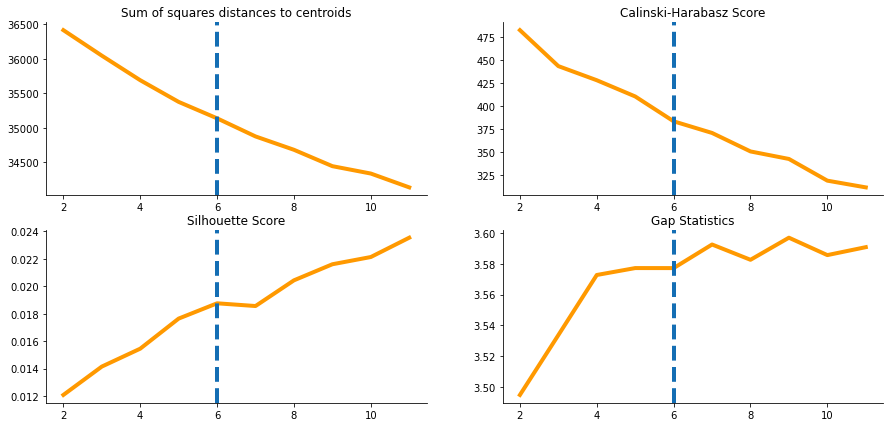

In [31]:
with open('res_mean_desk.pkl', 'rb') as f:
    res_mean = pickle.load(f)

cat  = 'desk'
svd = TruncatedSVD(n_components=2, random_state=1337)
df_cat = df.loc[df.subcat == cat].copy()
bow = bow_ng_all[cat][(df_cat.review_date.dt.year
                       >= 2008).to_numpy()]
X_ng_new = svd.fit_transform(bow.to_numpy())
i = 7

display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 7. Internal validation for category Desk.</b></center>'''))

i += 1

display(HTML(f'''<h3 style="text-align:center">
                Optimal number of clusters at k = 
                <b style="color:{AMAZON_COLORS[1]}">
                6</b>
                </h3>'''))

plot_validation(res_mean)

Using internal validation, it seems that at k=6 we were able to get a high gap statistics, low sum of squares distances to centroids, high silhouette score while maintaining a small number of clusters. 

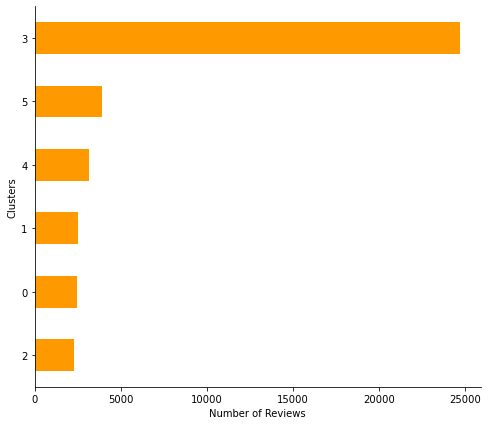

In [32]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 8. Distribution of clusters for Desk category.</b></center>'''))
i += 1
df_cat_cl = plot_cluster_dist(df_cat, 6)

It seems that most customers have similar sentiments at cluster 3. We can see that aside from cluster 3, all other clusters maintain a balanced number of reviews.

#### ii. Cluster Word Cloud

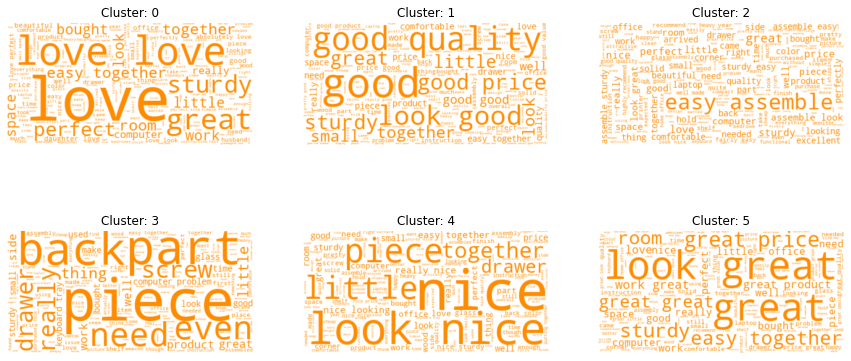

In [33]:
display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 9. Cluster word clouds for Desk category.</b></center>'''))
i += 1
plot_cluster_word_cloud(df_cat_cl)    

Analyzing based on the frequency of words that occur on each cluster, the following observations have been made about what customers for each cluster value most:
1. Cluster 0 - sturdiness of a desk
2. Cluster 1 - good quality
3. Cluster 2 - easy assembly 
4. Cluster 3 - dissatisfaction with words such as <code>piece</code>, <code>back</code>, and <code>problem</code>
5. Cluster 4 - aesthetic of the item with words such as <code>look nice</code>, and <code>nice looking</code>
6. Cluster 5 - pricing level of items

#### iii. Latent Semantic Analysis

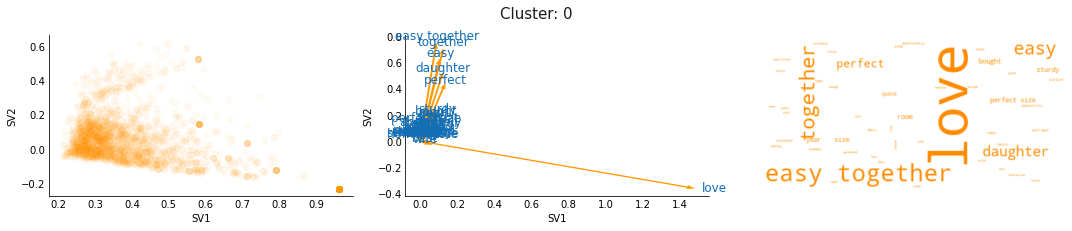

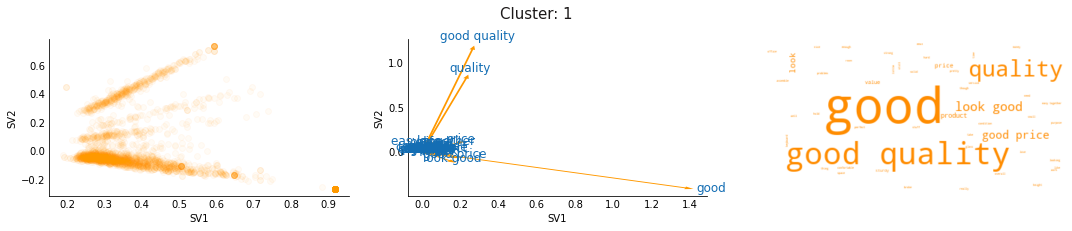

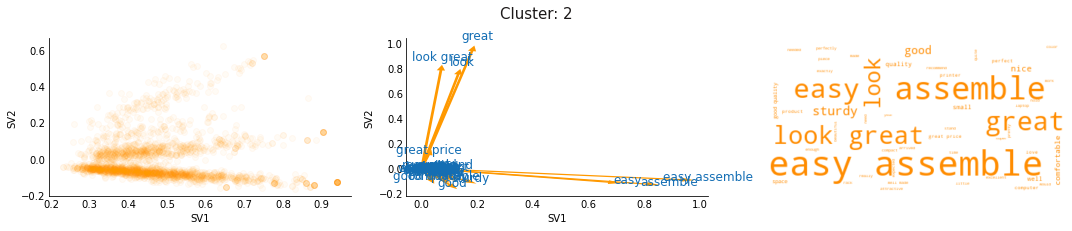

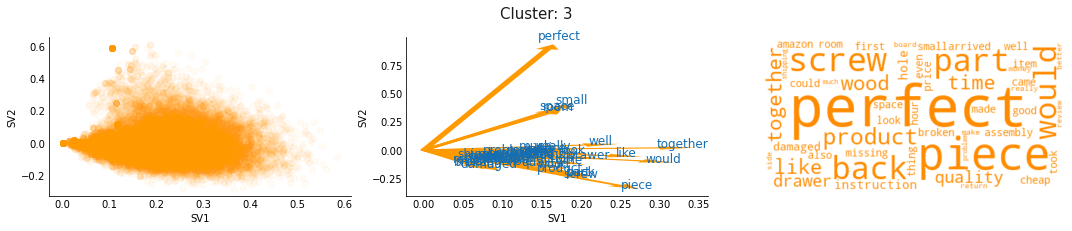

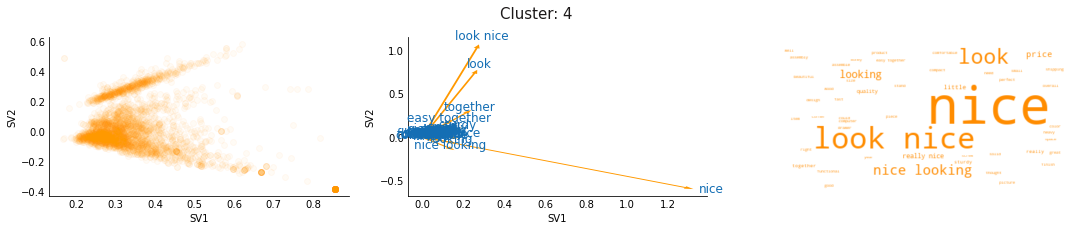

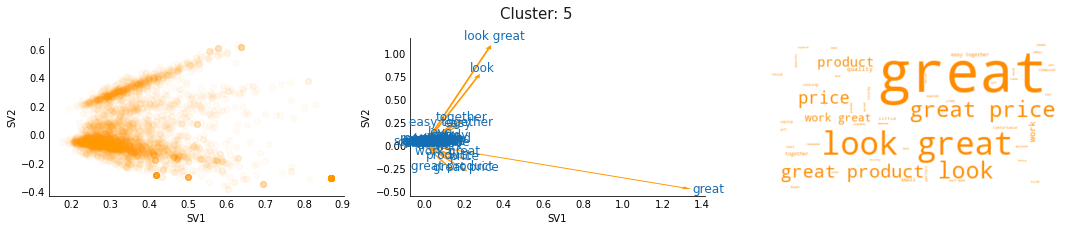

In [34]:
bow = bow.reset_index(drop=True)
df_cat_cl = df_cat_cl.reset_index(drop=True)

bow['clusters'] = df_cat_cl['clusters']

display(HTML('''<center style="font-size:12px;font-style:default;"><b>
Figure 10. Latent Semantic Analysis for Desk category.</b></center>'''))
i += 1
for cluster in range(len(df_cat_cl.clusters.unique())):
    svd = TruncatedSVD(n_components=2, random_state=1337)
    x = svd.fit_transform(bow[bow.clusters==cluster].iloc[:, :-1].to_numpy())
    p = svd.components_.T
    title = f'Cluster: {cluster}'
    feat_names = bow
    plot_lsa(x, p, feat_names, title)


Looking at the first principal components of our Latent Semantic Analysis, we can observe the following about what customers value most:
1. Cluster 0 - unlike the frequency of words, we can see that <code>easy together</code> appears to be the prominent sentiment as similar to that of cluster 2
2. Cluster 1 - good quality
3. Cluster 2 - easy assembly 
4. Cluster 3 - dissatisfaction with words such as <code>piece</code>, <code>back</code>, and <code>problem</code>
5. Cluster 4 - aesthetic of the item with words such as <code>look nice</code> and <code>nice looking</code>
6. Cluster 5 - pricing level of items

Using word frequency and LSA, we can see that most of the ideas of the themes are similar to each other except that of cluster 0

### B. Drawer

#### i. Clustering

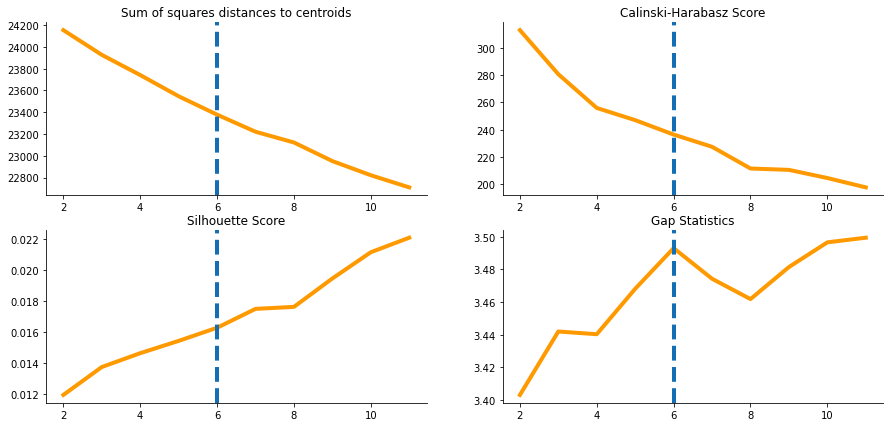

In [37]:
with open('res_mean_drawer.pkl', 'rb') as f:
    res_mean = pickle.load(f)

cat  = 'drawer'
svd = TruncatedSVD(n_components=2, random_state=1337)
df_cat = df.loc[df.subcat == cat].copy()
bow = bow_ng_all[cat][(df_cat.review_date.dt.year
                       >= 2008).to_numpy()]
X_ng_new = svd.fit_transform(bow.to_numpy())
i = 11
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Internal validation for category {cat.title()}.</b></center>'''))
i += 1
display(HTML(f'''<h3 style="text-align:center">
                Optimal number of clusters at k = 
                <b style="color:{AMAZON_COLORS[1]}">
                6</b>
                </h3>'''))

plot_validation(res_mean)


Similar to the desk category, it seems that at k=6, we were able to get a high gap statistics, low sum of squares distances to centroids, high silhouette score while maintaining a small number of clusters.

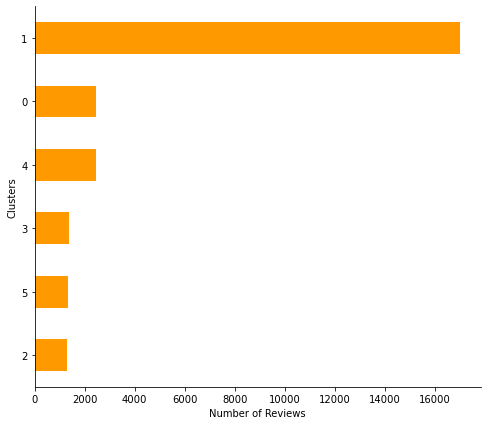

In [38]:
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Distribution of clusters for {cat.title()} 
category.</b></center>'''))
i += 1
df_cat_cl = plot_cluster_dist(df_cat_cl, 6)

It seems that most customers have similar sentiments at cluster 1. We can see that aside from cluster 1, cluster 0 and cluster 4 have almost equal count and cluster 3, 5, and 2 have the least number of reviews.

#### ii. Cluster Word Cloud

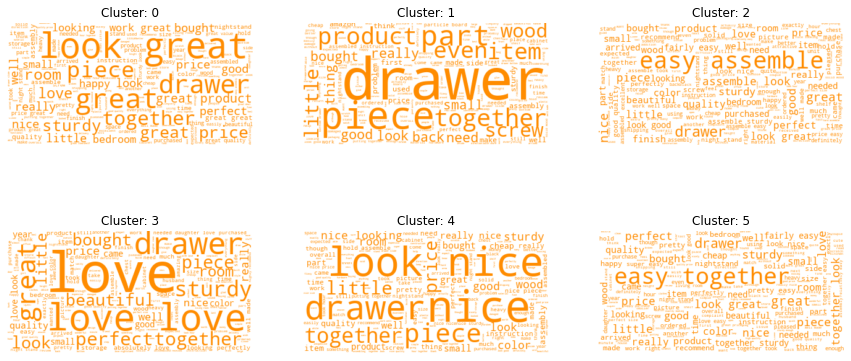

In [39]:
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Cluster word clouds for {cat.title()} category.</b></center>'''))
i += 1
plot_cluster_word_cloud(df_cat_cl)    

Analyzing based on the frequency of words that occur on each cluster, the following observations have been made:
1. Cluster 0 - value the aesthetic and price of the drawer with words such as <code>look great</code>, and <code>price</code>
2. Cluster 1 - wood product drawers
3. Cluster 2 - easy assembly 
4. Cluster 3 - dissatisfaction represented with words such as <code>piece</code>, <code>back</code>, <code>problem</code>
5. Cluster 4 - similar to cluster 0, customers value the aesthetic/price of the drawer with words such as <code>look nice</code>, and <code>price</code>
6. Cluster 5 - similar to cluster 2, easy together

#### iii. Latent Semantic Analysis

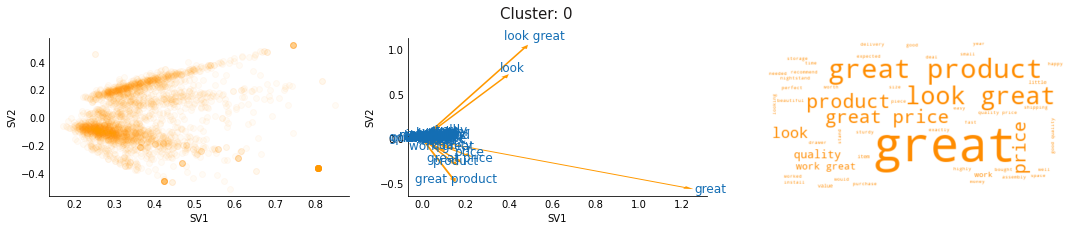

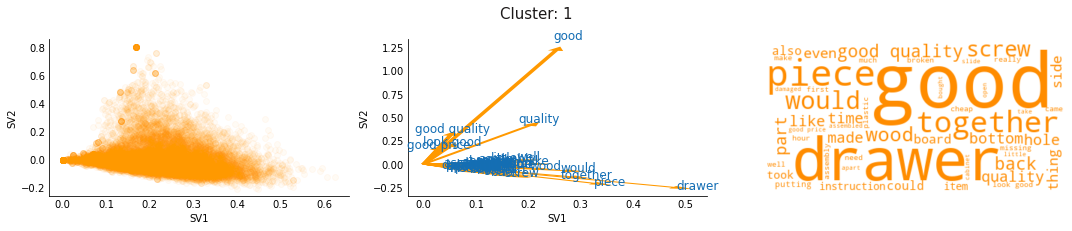

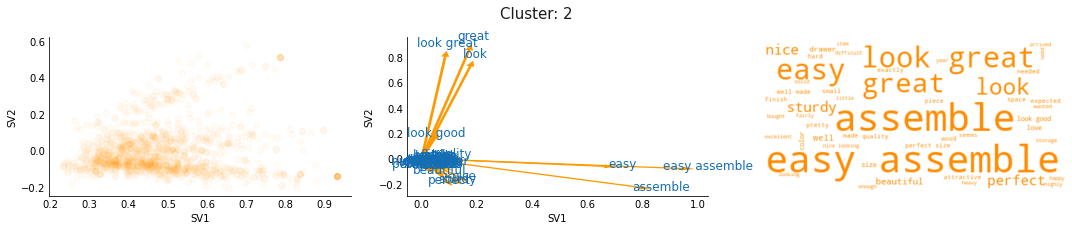

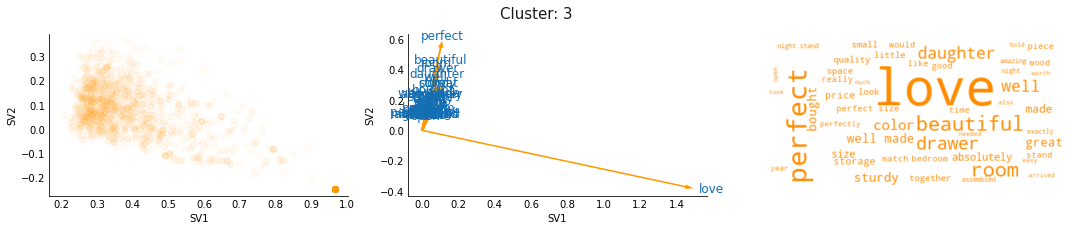

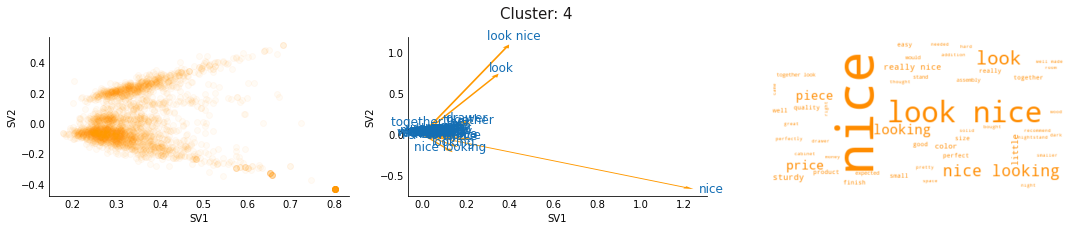

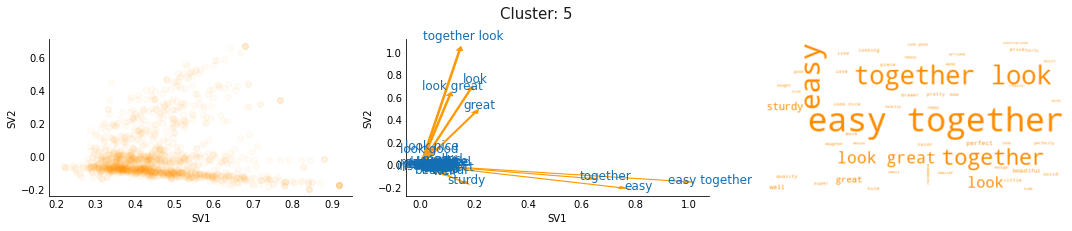

In [40]:
bow = bow.reset_index(drop=True)
df_cat_cl = df_cat_cl.reset_index(drop=True)

bow['clusters'] = df_cat_cl['clusters']

display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Latent Semantic Analysis for {cat.title()} 
category.</b></center>'''))
i += 1
for cluster in range(len(df_cat_cl.clusters.unique())):
    svd = TruncatedSVD(n_components=2, random_state=1337)
    x = svd.fit_transform(bow[bow.clusters==cluster].iloc[:, :-1].to_numpy())
    p = svd.components_.T
    title = f'Cluster: {cluster}'
    feat_names = bow
    plot_lsa(x, p, feat_names, title)

<p style="text-align:justify">We can see that words in our LSA results are similar to the words that we found using word frequency. We can see that cluster 1 correlates the <code>wood</code> with words such as <code>quality</code>, and <code>good quality</code>. In addition, for clusters 2 and 5, it seems that they prioritize easeness of assembly than that of aesthetic. We can see that words such as <code>easy together</code> seems to have triple the weight in SV1 with words such as <code>look great</code> while also having opposite direction in SV2.</p>

### C. Sofa

#### i. Clustering

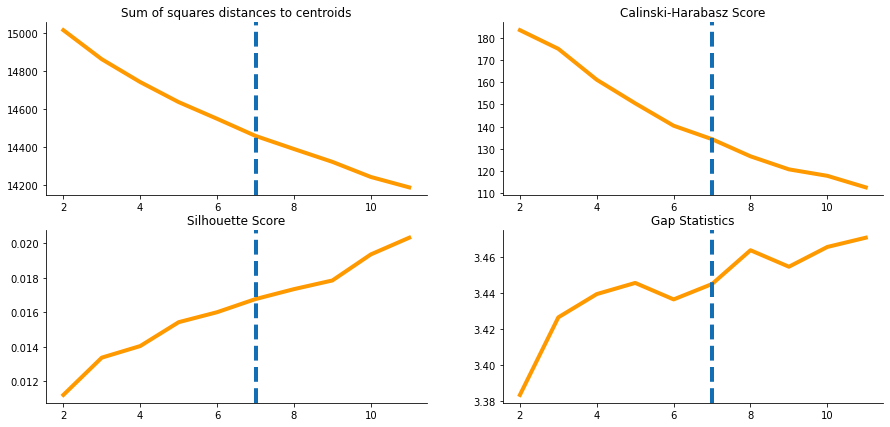

In [41]:
i = 15
with open('res_mean_sofa.pkl', 'rb') as f:
    res_mean = pickle.load(f)

cat  = 'sofa'
svd = TruncatedSVD(n_components=2, random_state=1337)
df_cat = df.loc[df.subcat == cat].copy()
bow = bow_ng_all[cat][(df_cat.review_date.dt.year
                       >= 2008).to_numpy()]
X_ng_new = svd.fit_transform(bow.to_numpy())

display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Internal validation for category {cat.title()}.</b></center>'''))
i += 1
display(HTML(f'''<h3 style="text-align:center">
                Optimal number of clusters at k = 
                <b style="color:{AMAZON_COLORS[1]}">
                7</b>
                </h3>'''))

plot_validation(res_mean, 7)

Through analysis of internal validation, we determined that the optimal number of clusters for the Sofa category to be at k=7. At k=7, we were also able to get more sensible themes for the category.

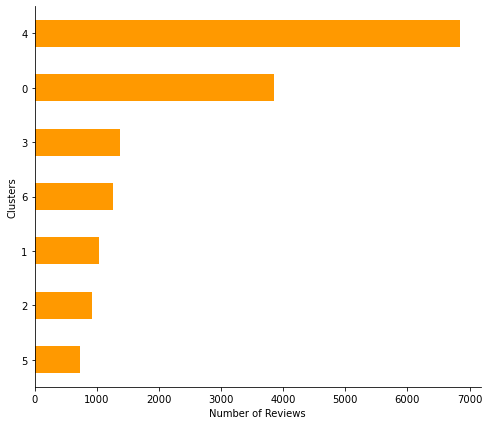

In [42]:
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Distribution of clusters for {cat.title()} 
category.</b></center>'''))
i += 1
df_cat_cl = plot_cluster_dist(df_cat, 7)

Similar to the previous categories, there is always one cluster that stands out the most. Aside from cluster 4, cluster 0 also seems to have a large number of reviews. The rest of the clusters appear to have a more balanced distribution among them.

#### ii. Cluster Word Cloud

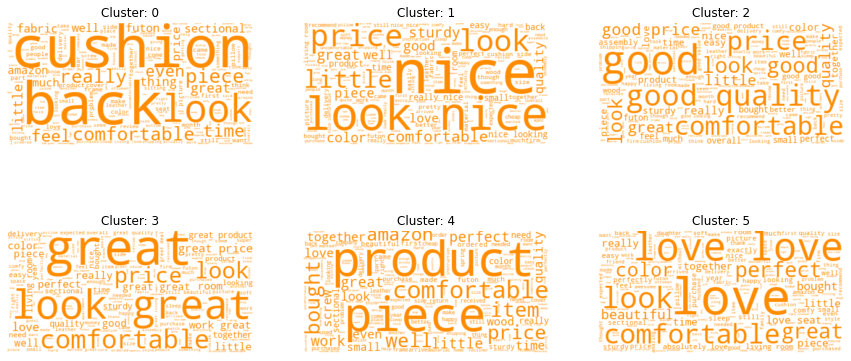

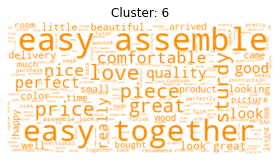

In [43]:
i = 17
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Cluster word clouds for {cat.title()} category.</b></center>'''))
i += 1
plot_cluster_word_cloud(df_cat_cl)  

Analyzing based on the frequency of words that occur on each cluster, the following observations have been made about what customers for each cluster value most:
1.	Cluster 0 - comfort (back cushion)
2.	Cluster 1 - comfort, aesthetic, price, sturdiness, size
3.	Cluster 2 - comfort, value for money
4.	Cluster 3 - comfort, aesthetic, price
5.	Cluster 4 - comfort, size, assembly items
6.	Cluster 5 - comfort, aesthetic
7.  Cluster 6 - comfort, sturdiness, easy assembly

#### iii. Latent Semantic Analysis

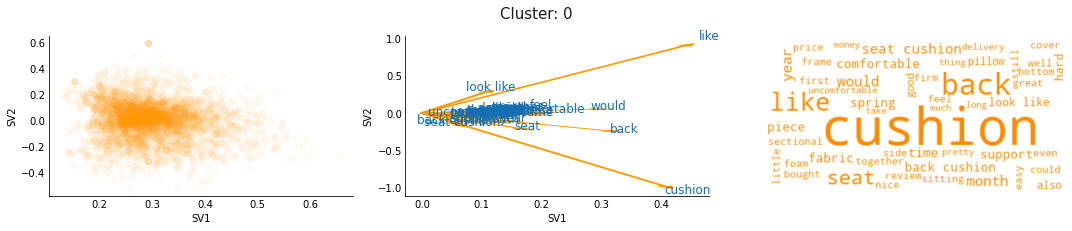

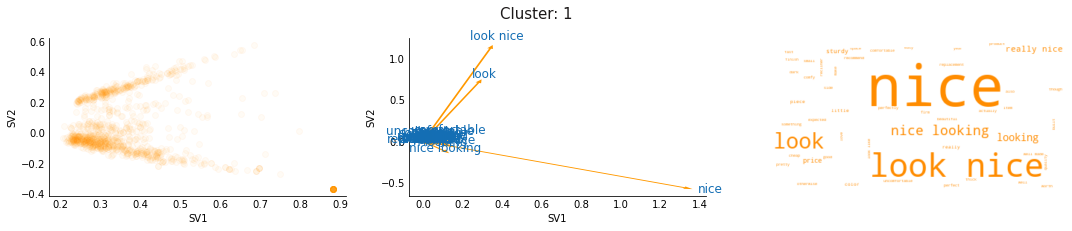

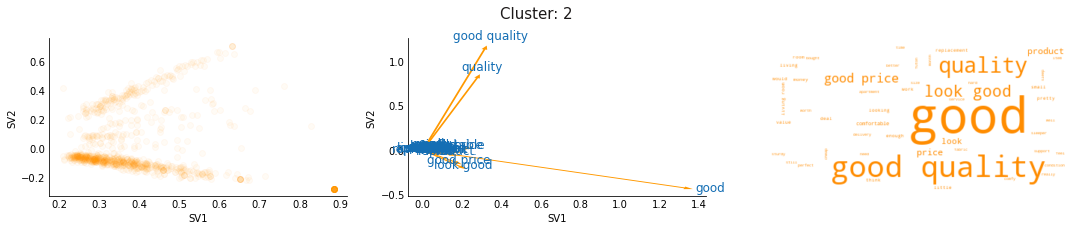

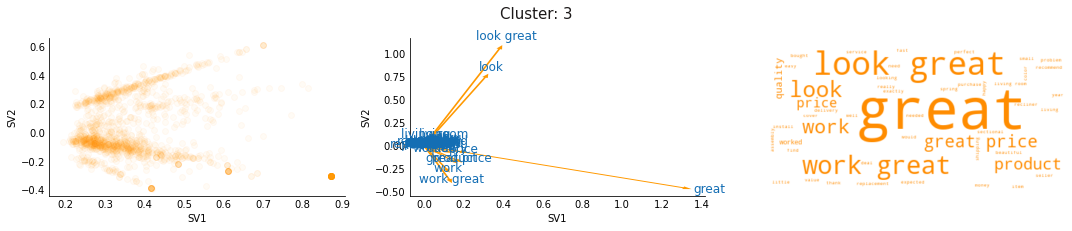

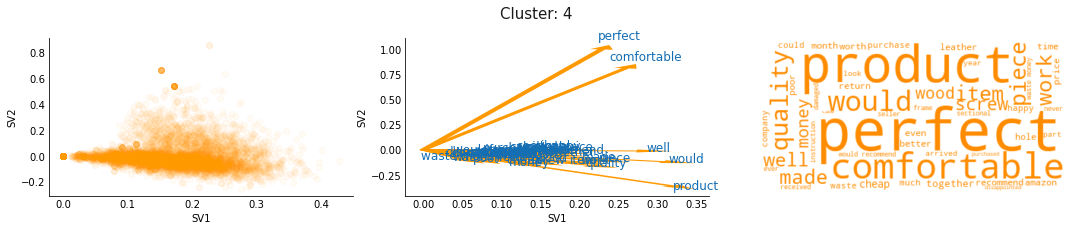

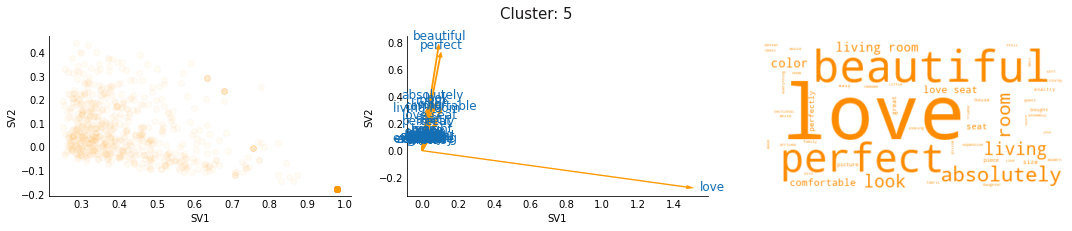

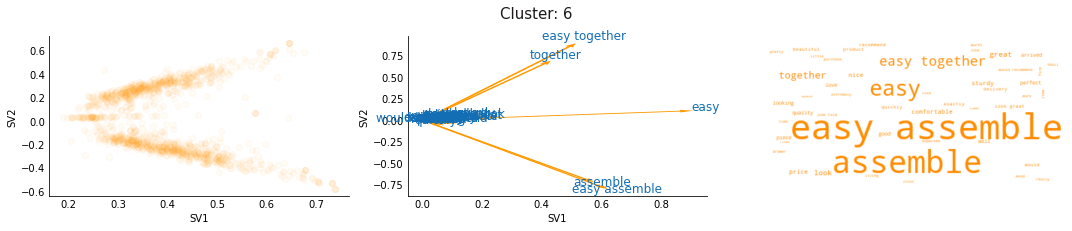

In [44]:
bow = bow.reset_index(drop=True)
df_cat_cl = df_cat_cl.reset_index(drop=True)

bow['clusters'] = df_cat_cl['clusters']

display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Latent Semantic Analysis for {cat.title()} 
category.</b></center>'''))
i += 1
for cluster in range(len(df_cat_cl.clusters.unique())):
    svd = TruncatedSVD(n_components=2, random_state=1337)
    x = svd.fit_transform(bow[bow.clusters==cluster].iloc[:, :-1].to_numpy())
    p = svd.components_.T
    title = f'Cluster: {cluster}'
    feat_names = bow
    plot_lsa(x, p, feat_names, title)

Looking at the first principal components of our Latent Semantic Analysis, we can observe the following:
1.	Cluster 0 - comfort (back cushion)
2.	Cluster 1 - unlike in the frequency of words, we see here that the main theme is aesthetic
3.	Cluster 2 - value for money
4.	Cluster 3 - unlike in the frequency of words, the common themes here shifted to aesthetic and work
5.	Cluster 4 - as compared to the frequency of words results, the results here replace the size theme with quality
6.	Cluster 5 - unlike in the frequency of words, the common themes here are aesthetic and living room
7.  Cluster 6 - as compared to the frequency of words results, the results here are now mainly focused on the theme of easy assembly

### C. Mattress

#### i. Clustering

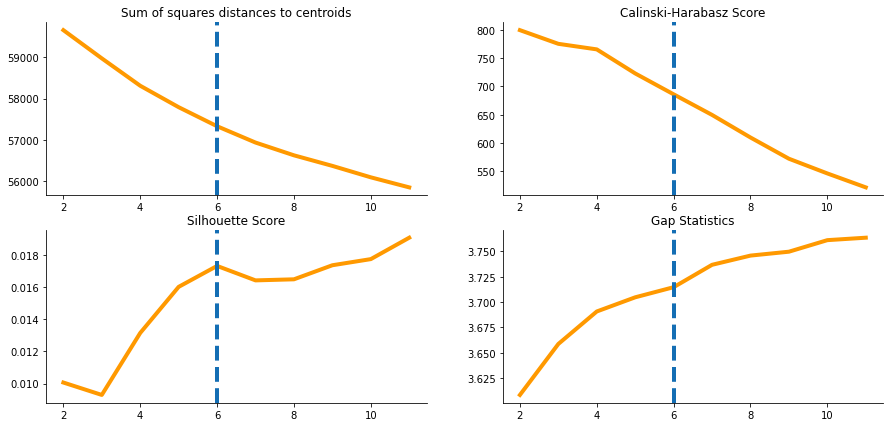

In [45]:
with open('res_mean_mattress.pkl', 'rb') as f:
    res_mean = pickle.load(f)

cat  = 'mattress'
svd = TruncatedSVD(n_components=2, random_state=1337)
df_cat = df.loc[df.subcat == cat].copy()
bow = bow_ng_all[cat][(df_cat.review_date.dt.year
                       >= 2008).to_numpy()]
X_ng_new = svd.fit_transform(bow.to_numpy())


display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Internal validation for category {cat.title()}.</b></center>'''))
i += 1
display(HTML(f'''<h3 style="text-align:center">
                Optimal number of clusters at k = 
                <b style="color:{AMAZON_COLORS[1]}">
                6</b>
                </h3>'''))

plot_validation(res_mean)

We can see that at k=6, there is an elbow at silhouette score and sum of squared distances.

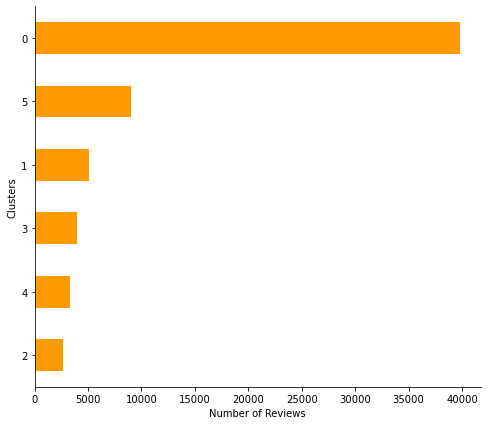

In [46]:
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Distribution of clusters for {cat.title()} 
category.</b></center>'''))
i += 1
df_cat_cl = plot_cluster_dist(df_cat, 6)

Cluster 0 dominates the number of reviews, while the rest of the clusters have a fairly similar distribution. It seems that apart from cluster 0, mattress customers have similar sentiments.

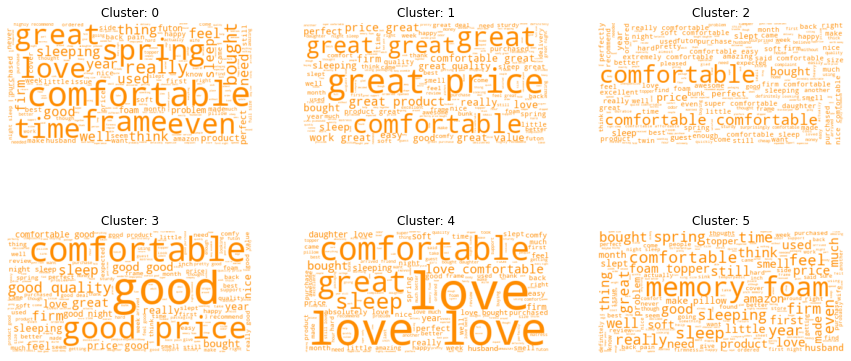

In [47]:
display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Cluster word clouds for {cat.title()} category.</b></center>'''))
i += 1
plot_cluster_word_cloud(df_cat_cl) 

Analyzing based on the frequency of words that occur on each cluster, the following observations have been made about what customers for each cluster value most:
1.	Cluster 0 - comfort, spring, frame, time
2.	Cluster 1 - comfort, price
3.	Cluster 2 - comfort
4.	Cluster 3 - comfort, value for money, quality of sleep, firmness
5.	Cluster 4 - comfort, daughter, husband, sleep, year (possibly length of time used)
6.	Cluster 5 - memory foam, comfort, spring, firmness, sleep, pillow


#### iii. Latent Semantic Analysis

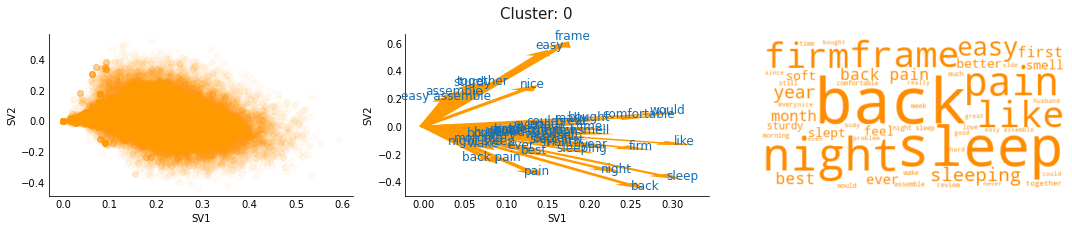

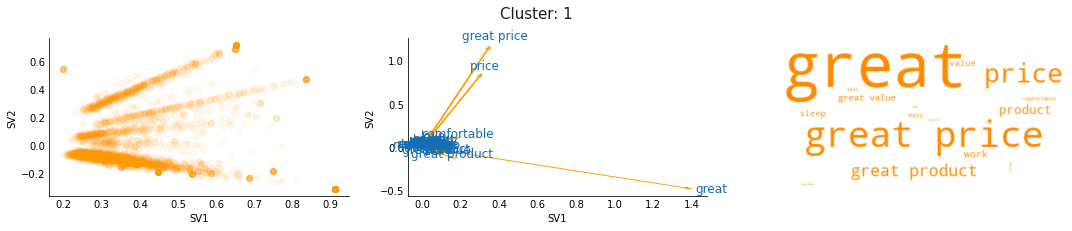

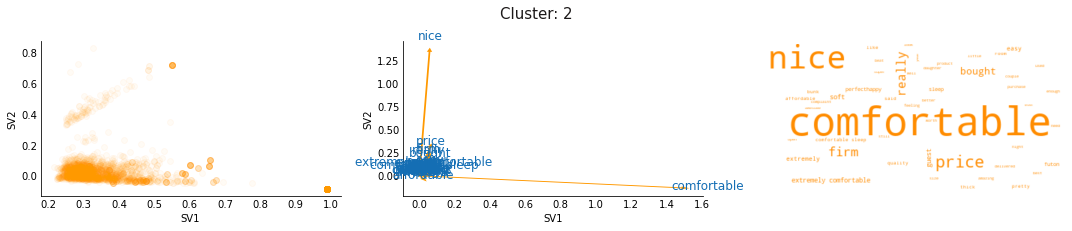

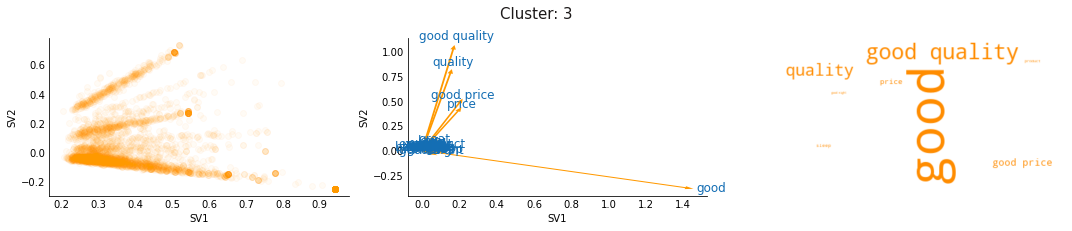

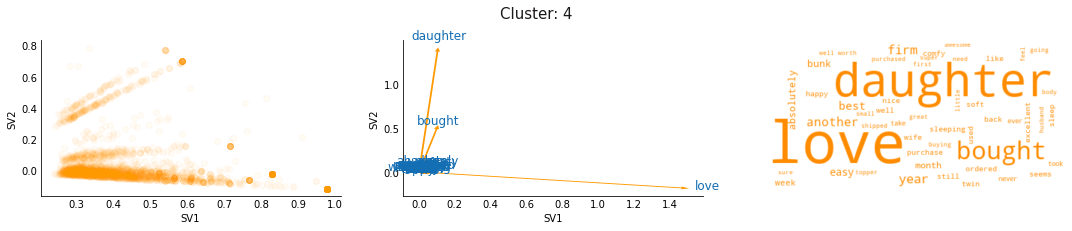

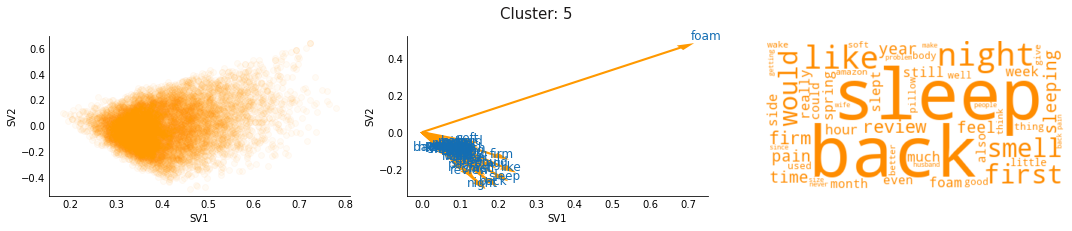

In [48]:
bow = bow.reset_index(drop=True)
df_cat_cl = df_cat_cl.reset_index(drop=True)

bow['clusters'] = df_cat_cl['clusters']

display(HTML(f'''<center style="font-size:12px;font-style:default;"><b>
Figure {i}. Latent Semantic Analysis for {cat.title()} 
category.</b></center>'''))
i += 1
for cluster in range(len(df_cat_cl.clusters.unique())):
    svd = TruncatedSVD(n_components=2, random_state=1337)
    x = svd.fit_transform(bow[bow.clusters==cluster].iloc[:, :-1].to_numpy())
    p = svd.components_.T
    title = f'Cluster: {cluster}'
    feat_names = bow
    plot_lsa(x, p, feat_names, title)

Looking at the first principal components of our Latent Semantic Analysis, we can observe the following:
1.	Cluster 0 - unlike in the frequency of words, the main themes here are now sleep, back pain, frame, firmness, night
2.	Cluster 1 - unlike in the frequency of words, the main theme is now solely pricing level of items
3.	Cluster 2 - the themes of price and firmness were added to the comfort theme from the frequency of words results
4.	Cluster 3 - unlike in the frequency of words, the main theme is now solely value for money
5.	Cluster 4 - unlike in the frequency of words, the main themes here are now daughter, wife, firmness, sleep, and year (possibly length of time used)
6.	Cluster 5 - unlike in the frequency of words, the main themes here are now sleep, back, smell, spring, firmness, pillow


## VI. Conclusion

<p style="text-align:justify">Amazon continues to dominate the online retailing scene as reported by several reputable media institutions such as CNBC and Forbes. This is highly attributable to their large and loyal customer base as reflected in their consistently high overall average customer ratings from 2002 to 2015 (scope of this study). 
<br><br>When we studied these customer ratings for the furniture line items through time, we observed the presence of seasonality, prominent in the earlier years. This could imply that either they still had not fully understood the priorities of their customers when it comes to buying furniture or customers were still not used to how online shopping for furniture works. In the latter years, however, we saw how Amazon was able to steadily increase the ratings until they reached a level where they were constantly high. This denotes that Amazon was finally able to understand the preferences of their customers when buying furniture and that the customers have become savvy with doing online purchases even for relatively expensive items such as furniture.
<br><br>Since the primary goal of this study was to identify the different customer segments of the Amazon furniture categories: desk, drawer, sofa, and mattress, we narrowed our focus on the contents of the review section. Through the application of K-Means clustering accompanied by internal validation and Latent Semantic Analysis thereafter, we were able to generate word clouds representing the characteristics of each cluster in each category.
<br><br>Through analysis of the different clusters, we were able to extract the following insights which we translated into customer segments as illustrated below this cell:<br><br>
    <li><b>Across all furniture categories considered for this study, there were two common customer segments:</b></li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 1: Customers who prioritize value for money of the item bought -  <i>Wilson, the Wise Shopper</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 2: Customers who are price-conscious - <i>Thrifty Tina</i><br><br>
    <li><b>For the desk, drawer, and sofa categories, items entailed assembly of parts. We then discovered the following customer segments from these
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;three categories:</b></li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 1: Customers who greatly value easeness of assembly of item bought - <i>Busy Benjamin</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 2: Customers who value the overall aethetic of the item - <i>Iman, the Influencer</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 3: Customers who are very particular with the quality of the components of the item bought - <i>Finn, the Furniture Enthusiast</i><br><br>
    <li><b>We focused on the mattress category for the last set of segments as it had clusters which were notably different from the clusters of the other
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;categories given the nature of the items.</b></li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 1: Customers who prefer the mattress with bed frame set - <i>Nick and Norah, the Newlyweds</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 2: Customers who buy for their family members - <i>Bianca, the Breadwinner</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Segment 3: Customers who are sensitive to the smell and spring component of the item - <i>Meticulous Mars</i></p>

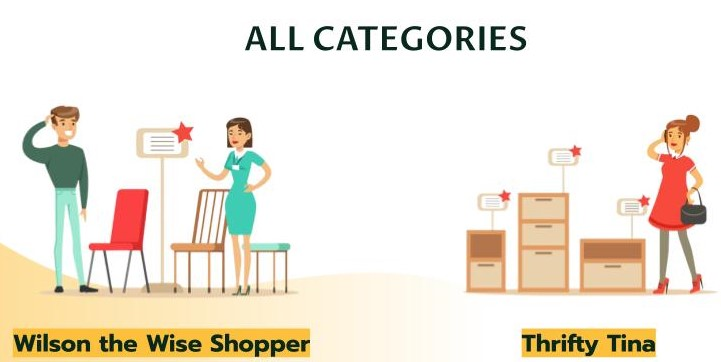

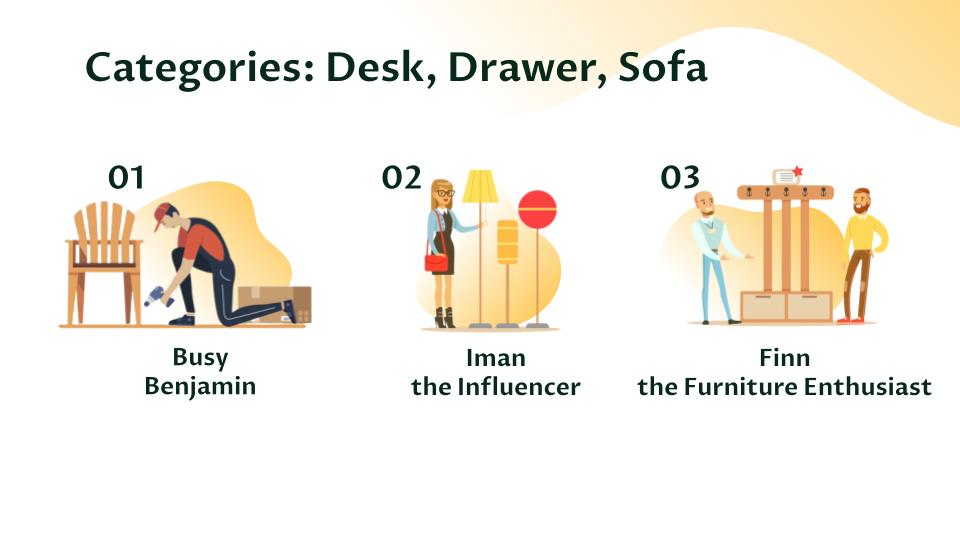

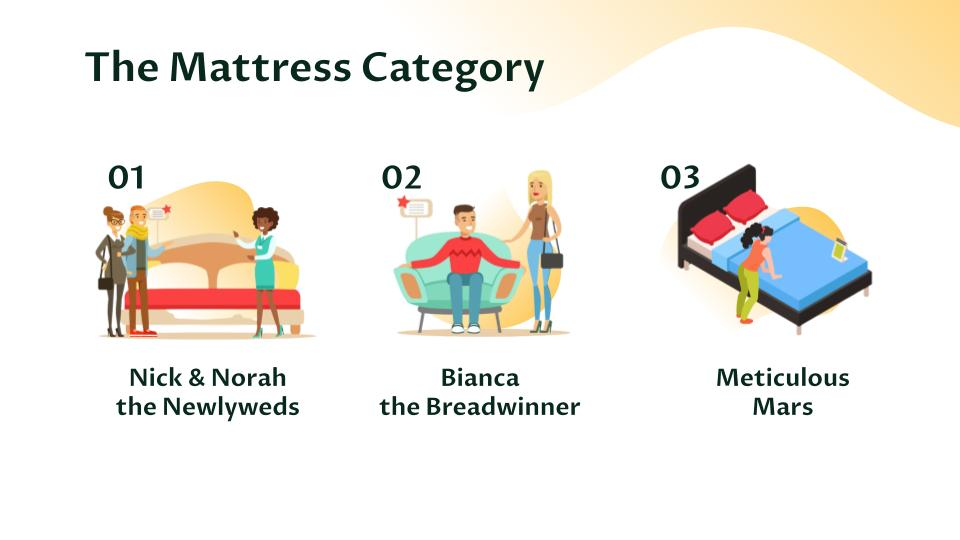

In [4]:
display(Image('outputs/customer_segments_1.png'))
display(Image('outputs/customer_segments_2.png'))
display(Image('outputs/customer_segments_3.png'))

## VII. Recommendations

<p style="text-align:justify"> We recommend that Amazon use the customer segments we have identified above in implementing more targeted marketing campaigns to help retain and grow their current customer base. 
<br><br>As mentioned in the introduction part of this report, Amazon started to create in-house brands of top-selling items. In 2019, they created two private-label furniture brands, Rivet (mid-century modern) and Stone & Beam (farmhouse chic). These brands aim to create stylish furniture items that would be accessible and affordable for customers.$^3$ We acknowledge the limitation that words extracted, such as quality and aesthetic, are not specific enough to be useful in Amazon's conceptualization stage when creating new furniture items. However, we believe that the customer segments illustrated above will be a good starting point for them to look deeper into in determining the specifications of customer preferences for each segment.
<br><br>For further improvement of this study, we recommend that adjectives such as perfect and nice be excluded from the analysis. While studying the word clouds generated after LSA and translating them to customer segments, we realized that these words are very subjective and do not really add any valuable insights to the problem we are trying to answer in this report. 
<br><br>This study was limited to customer feedback on four categories of Amazon's furniture line generated from 2002 to 2015. For further studies, we recommend that feedback from more recent years (2016 to present) be included to add more relevance to the insights as the e-commerce scene is fast-changing.
<br><br>This report only focused on US sales. A comparative analysis on sales to Western regions versus sales to Asian regions may also be a good angle to take on a further study. It could give rise to interesting insights about differing or similar consumer behavior patterns when it comes to purchasing furniture online.</p>

## References

[1] Thomas, L. (2021) "As e-commerce sales proliferate, Amazon holds on to top online retail spot". https://www.cnbc.com/2021/06/18/as-e-commerce-sales-proliferate-amazon-holds-on-to-top-online-retail-spot.html

[2] Kim, E. (2017) "As Amazon’s dominance grows, suppliers are forced to play by its rules". https://www.cnbc.com/2017/12/21/as-amazons-dominance-grows-suppliers-are-forced-to-play-by-its-rules.html

[3] Kaplan, S. (2021) "We tested Amazon's affordable mid-century and farmhouse chic furniture and the pieces are surprisingly comparable to CB2 and West Elm". https://www.businessinsider.com/amazon-furniture-rivet-stone-and-beam-review